In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import scale, label_binarize
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [17]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

In [4]:
CV = 5
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
nonlbls = ['AvgPowerDensity', 'ModDensity', 'UiWeight']
train = pd.read_pickle('/mnt/researchdrive/BOX_INTERNAL/opotowsky/sim_grams_nuc29.pkl')

In [7]:
X = train.drop(lbls, axis=1)
for nonlbl in nonlbls+['total']:
    if nonlbl in X.columns:
        X.drop(nonlbl, axis=1, inplace=True)
y = train.loc[:, lbls[0]]

In [26]:
X = scale(X)

In [27]:
cv = StratifiedKFold(n_splits=CV, shuffle=True)
knn_init = KNeighborsClassifier(n_neighbors=4, weights='distance', p=1, metric='minkowski')
dtr_init = DecisionTreeClassifier(max_depth=56, max_features=None, class_weight='balanced')

In [37]:
#rxtrs = ['pwr', 'bwr', 'phwr']
rxtrs = ['bwr', 'phwr', 'pwr']

In [38]:
y_bin = label_binarize(y, classes=rxtrs)
n_classes = 3
y_bin

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [29]:
y_score_knn = cross_val_predict(knn_init, X, y, cv=cv, method='predict_proba')

In [31]:
y_score_knn

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
y_score_dtr = cross_val_predict(dtr_init, X, y, cv=cv, method='predict_proba')

In [39]:
fpr_knn = dict()
tpr_knn = dict()
auc_knn = dict()
#fpr_dtr = dict()
#tpr_dtr = dict()
#auc_dtr = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_bin[:, i], y_score_knn[:, i])
    #fpr_dtr[i], tpr_dtr[i], _ = roc_curve(y_bin[:, i], y_score_dtr[:, i])
    auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    #auc_dtr[i] = auc(fpr_dtr[i], tpr_dtr[i])

In [42]:
def plot_roc(fpr, tpr, auc, alg):
    color = ['Brwn', 'Purp', 'Teal']
    for i, c in zip(range(n_classes), color):
        plt.plot(fpr[i], tpr[i], lw=2, color=colors['M'+c],
                 label='ROC, {0} (AUC = {1:0.2f})'.format(rxtrs[i], auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for {}'.format(alg))
    plt.legend(loc="lower right")
    plt.show()
    return

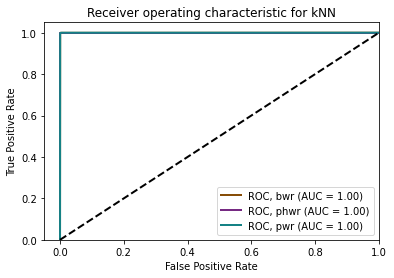

In [43]:
plot_roc(fpr_knn, tpr_knn, auc_knn, 'kNN')

In [ ]:
plot_roc(fpr_dtr, tpr_dtr, auc_dtr, 'Dec Tree')